In [2]:
import os
import numpy as np
import pandas as pd
import pathlib
import glob
import kaleido


def generate_read_frequency_updated_v3(week_folder_path):
    """
    Generate the read_frequency table for a given week's folder.
    
    Parameters:
    - week_folder_path (str): Path to the folder containing the week's CSV files.
    
    Returns:
    - DataFrame: read_frequency table for the week.
    """
    
    # Step 1: Load CSVs from a Folder
    user_ids = []
    for filename in os.listdir(week_folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(week_folder_path, filename)
            day_data = pd.read_csv(file_path, usecols=[0])
            user_ids.extend(day_data.iloc[:, 0].tolist())  # Extract the first column as a series
    
    # Step 2: Combine & Count User IDs
    user_counts = pd.Series(user_ids).value_counts()
    
    # Step 3: Generate read_frequency Table
    frequency_series = user_counts.value_counts()
    frequency_series.name = "tally"  # Explicitly setting the name to avoid naming collisions
    frequency_df = frequency_series.reset_index()
    frequency_df.columns = ["frequency", "tally"]
    frequency_df["percentage"] = (frequency_df["tally"] / frequency_df["tally"].sum()) * 100
    frequency_df = frequency_df.sort_values(by="frequency").reset_index(drop=True)
    
    return frequency_df




# This function can now be called for each week's folder to get the corresponding read_frequency table.


In [3]:
import os
import matplotlib.pyplot as plt

In [4]:


def visualize_combined_engagement_v2(en_week_folders, ar_week_folders, img_name):
    """
    Generate a stacked bar chart representing email open frequency for multiple weeks 
    with a distinct color scheme for English and Arabic data.
    
    Parameters:
    - en_week_folders (list): A list of folder paths for each English week.
    - ar_week_folders (list): A list of folder paths for each Arabic week.
    - img_name (str): Name of the image file to save the plot.
    
    Returns:
    - Displays the stacked bar chart.
    """
    
    # Distinct Color map for EN and AR frequencies
    en_color_map = {
        1: "#add8e6",  # light blue
        2: "#1f77b4",  # medium blue
        3: "#1565c0",  # darker blue
        4: "#0d47a1"   # darkest blue
    }
    
    ar_color_map = {
        1: "#90ee90",  # light green
        2: "#2ca02c",  # medium green
        3: "#008000",  # darker green
        4: "#006400"   # darkest green
    }
    
    # Combine EN and AR folders and label names
    combined_folders = en_week_folders + ar_week_folders
    en_labels = [os.path.basename(path) + " EN" for path in en_week_folders]
    ar_labels = [os.path.basename(path) + " AR" for path in ar_week_folders]
    combined_labels = en_labels + ar_labels
    
    # Gather data for each week
    weekly_data = [generate_read_frequency_updated_v3(path) for path in combined_folders]
    
    # Plotting
    fig, ax = plt.subplots(figsize=(15, 8))
    for week_index, data in enumerate(weekly_data):
        bottom_value = 0  # To stack bars
        color_map = en_color_map if week_index < len(en_week_folders) else ar_color_map
        for _, row in data.iterrows():
            ax.bar(week_index, row['tally'], bottom=bottom_value, color=color_map.get(row['frequency'], "#333333"))
            # Adding percentage text inside bars
            ax.text(week_index, bottom_value + (0.5 * row['tally']), f"{row['percentage']:.2f}%", 
                    ha='center', va='center', color='white', fontsize=10)
            bottom_value += row['tally']
        # Labeling total tally on top of each bar
        ax.text(week_index, bottom_value, str(int(bottom_value)), ha='center', va='bottom', color='black', fontsize=10)
    
    # Adjusting the plot
    ax.set_xticks(range(len(combined_folders)))
    ax.set_xticklabels(combined_labels, rotation=45)
    ax.set_ylabel("Number of Users")
    ax.set_title("Weekly Email Open Frequencies (EN & AR)")
    plt.tight_layout()
    plt.savefig(img_name)
    plt.show()

# The function is now updated with a distinct color scheme for English and Arabic data.


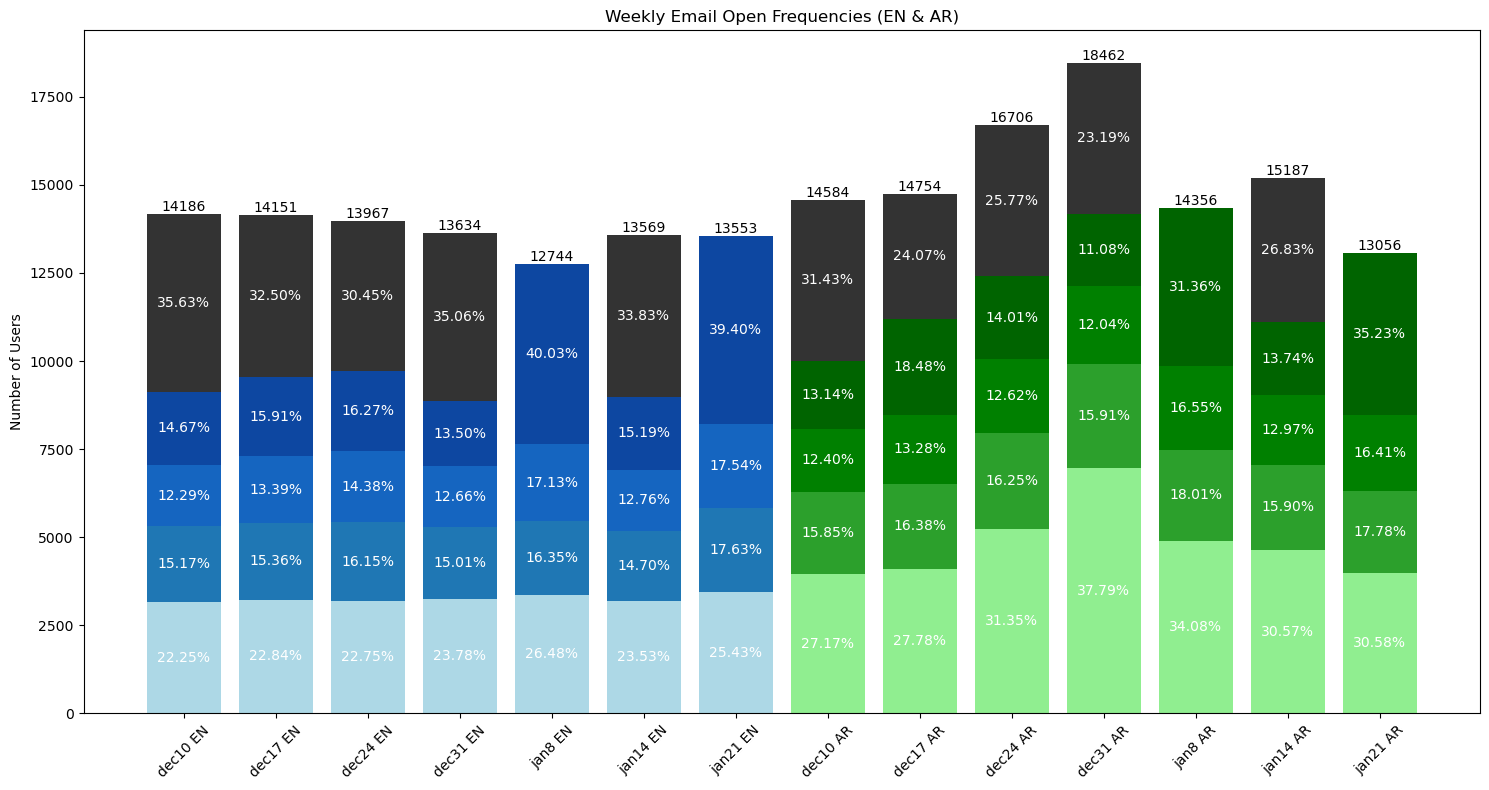

In [5]:
en_week_folders = [

    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\dec10",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\dec17",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\dec24",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\dec31",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\jan8",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\jan14",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\en\jan21",





]


ar_week_folders = [

    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\dec10",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\dec17",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\dec24",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\dec31",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\jan8",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\jan14",
    r"C:\Users\Ahmed\Desktop\Claps\all hands\engagment\weeks\ar\jan21",


]
visualize_combined_engagement_v2(en_week_folders, ar_week_folders, "Combined_Engagement_ColorUpdated_jan21")
